<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/Dev/Project%202/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Install Keras for Neural Network

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Import necessary objects from Keras

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Load MNIST dataset

(60000, 28, 28)


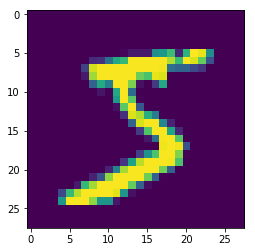

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

import matplotlib for platting and print the shape of the dataset. Display a sample image from the dataset MNIST

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Reshape X_train and X_test to format specific for CNN

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Convert all the image data to a scale of 0-255. Normalizing the images to get grayscale images

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Looking at some samples from the target data

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Converting the target variable to categorical as we are going to build a classification model

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation, MaxPooling2D                               #import Convolution objects

model = Sequential()                                                            # initialing the keras model object
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))    

# no. of kernals:32, kernel dim:3*3, activation func: relu, input channel dim: 28*28*1
# grf: 3*3, channel dim: 26*26

model.add(Convolution2D(64, 3, 3, activation='relu'))

# no. of kernals:64, kernel dim:3*3, activation func: relu, input channel dim: 28*28*32
# grf: 5*5, channel dim: 24*24

model.add(Convolution2D(128, 3, 3, activation='relu'))

# no. of kernals:128, kernel dim:3*3, activation func: relu, input channel dim: 28*28*64
# grf: 7*7, channel dim: 24*24

model.add(MaxPooling2D(pool_size=(2, 2)))

# Max Pooling with 2*2, input channel dim: 28*28*128
# grf: 7*7, channel dim: 12*12

model.add(Convolution2D(256, 3, 3, activation='relu'))

# no. of kernals:256, kernel dim:3*3, activation func: relu, input channel dim: 12*12*256
# grf: 9*9, channel dim: 10*10

model.add(Convolution2D(512, 3, 3, activation='relu'))

# no. of kernals:512, kernel dim:3*3, activation func: relu, input channel dim: 10*10*512
# grf: 11*11, channel dim: 8*8

model.add(Convolution2D(1024, 3, 3, activation='relu'))

# no. of kernals:1024, kernel dim:3*3, activation func: relu, input channel dim: 8*8*1024
# grf: 13*13, channel dim: 6*6

model.add(Convolution2D(2048, 3, 3, activation='relu'))

# no. of kernals:2048, kernel dim:3*3, activation func: relu, input channel dim: 6*6*2048
# grf: 15*15, channel dim: 4*4

model.add(Convolution2D(10, 3, 3, activation='relu'))

# no. of kernals:64, kernel dim:3*3, activation func: relu, input channel dim: 4*4*10
# grf: 17*17, channel dim: 2*2

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0731 18:25:16.159292 139931860825984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0731 18:25:16.202811 139931860825984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 18:25:16.211542 139931860825984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0731 18:25:26.013956 139931860825984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0731 18:25:26.042618 139931860825984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Defining Loss Function, Optimzer type and evaluation metric

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0731 18:27:27.428273 139931860825984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0731 18:27:27.518048 139931860825984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - a

Training the model
batch size: no. of samples after which the networks weights will be updated using back propagation
nb_epoch: no. of times the training has to be repeated
verbose: display status of the training

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

evaluate the trained model againt the test data using sccuracy as a metric

In [17]:
print(score)

[2.3025851249694824, 0.098]


displaying accuracy score

In [0]:
y_pred = model.predict(X_test)

Predicting the classes of test data using the trained model

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


display actual and predicted class to see the difference visually

After max pooling adding 512 kernels can be computationally hungry